# Instrukcja - Transformacja Hougha

### Cel:
- zapoznanie z transformacją Hougha dla pojedynczego punktu,
- kilku punktów, prostych figur
- wykorzystanie transformacji Hougha do detekcji linii prostych na rzeczywistym obrazie
- transformacja Hougha w przestrzeni ab

### Transformacja Hough'a

Transformacja Hougha dla prostych jest metodą detekcji współliniowych punktów. Każda prosta może być jednoznacznie przedstawiona za pomocą dwóch parametrów. Przestrzeń tych parametrów to przestrzeń Hougha. Najczęściej wykorzystywanymi parametrami w tej metodzie są współczynniki ρ,θ

opisujące równanie prostej w postaci normalnej:

ρ=x⋅cos(θ)+y⋅sin(θ)

gdzie: ρ - promień wodzący, θ - kąt pomiędzy ρ a osią OX.

Własności transformacji Hougha:
- prostej w przestrzeni kartezjańskiej odpowiada punkt w przestrzeni Hougha
- pękowi prostych przechdzących przez punkt w przestrzeni kartezjańskiej odpowiada krzywa sinusoidalna w przestrzeni Hougha
- punkty leżące na tej samej prostej (w przestrzeni kartezjańskiej) korespondują z sinusoidami przechodzącymi przez wspólny punkt w przestrzeni Hougha.

Metoda wyliczania transformacji Hougha składa się z następujących kroków:
- przez każdy badany (różny od zera) punkt obrazu prowadzony jest pęk prostych, przechodzących przez ten punkt
- każda z tych prostych transformowana jest do przestrzeni Hougha i tworzy tam punkt o współrzędnych ρ,θ
- w ten sposób, każdy punkt obrazu pierwotnego (pęk prostych) jest odwzorowany w sinusoidalną krzywą w przestrzeni Hougha

Przestrzeń Hougha jest przestrzenią akumulacyjną tzn. punkty sinusoidalnych krzywych, wygenerowanych dla punktów obrazu pierwotnego dodają się w miejscach, w których krzywe te przecinają się. Powstałe w ten sposób (w przestrzeni Hougha) maksima odpowiadają zbiorom punktów, należących do jednej prostej. Współrzędne ρ,θ
tego maksimum jednoznacznie określają położenie prostej na obrazie pierwotnym.

### Transformacja Hougha dla małej liczby punktów.
   1. Uruchom poniższy kod. W tablicy `im` wskaż jeden punkt, dla którego ma zostać obliczona transformata.

(-0.5, 63.5, 63.5, -0.5)

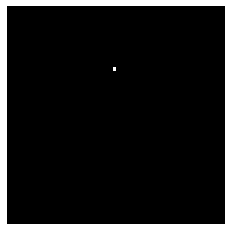

In [31]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import wget
import os

if not os.path.exists("kwadraty.png") :
    wget.download('https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/kwadraty.png') #--no-check-certificate
if not os.path.exists("lab112.png") :
    wget.download('https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/lab112.png') #--no-check-certificate
if not os.path.exists("dom.png") :
    wget.download('https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/dom.png') #--no-check-certificate

im = np.zeros((64,64), dtype=np.uint8)

im[18, 31] = 1

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
ax.imshow(im, 'gray')
ax.axis('off')


3. Wykonaj transformację Hougha obazu im. Wykorzystaj funkcję *hough_line* z modułu _skimage.transform_. Funkcja zwraca: macierz H (przestrzeń Hougha) oraz dwa wektory theta i rho dla kolejnych 
4. Wyświetl przestrzeń Hougha za pomocą funkcji _plt.imshow_ (można też wykorzystać poniższą funkcję *show_hough*). Jak "wygląda" pojedynczy punkt w przestrzeni Hougha?

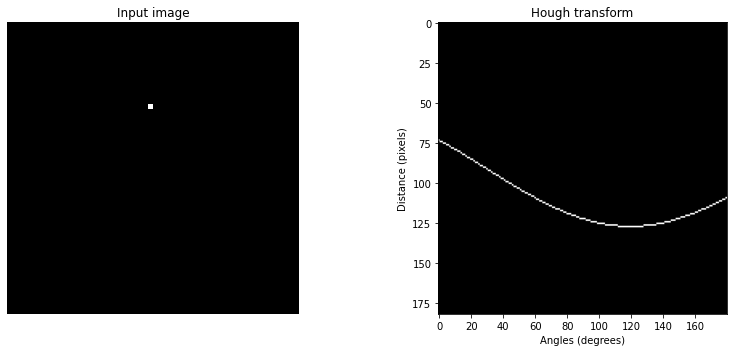

In [32]:
def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')
    
    plt.tight_layout()
    plt.show()    

H, theta, rho = hough_line(im)
show_hough(H, im)

5. Powtórz punkty 1-4, ale tym razem klinkij dwa punkty. Jak zmienia się przestrzeń Hougha?
6. Powtórz punkty 1-4, ale tym razem kliknij kilka punktów starając się aby były współliniowe. Zaobserwuj zmiany w przestrzeni Hougha
7. Poeksperymentuj z różnymi układami punktów

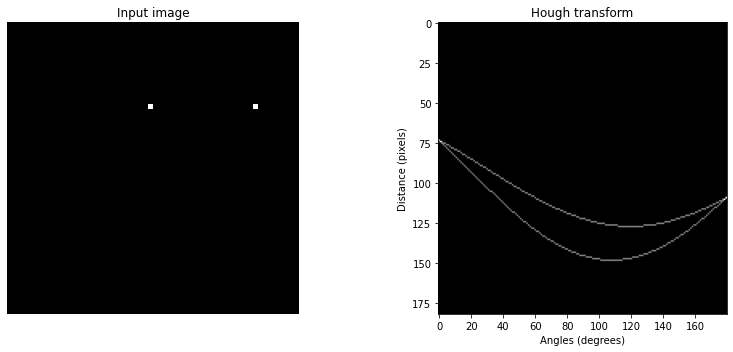

In [33]:
im2 = np.zeros((64,64), dtype=np.uint8)
im2[18, 31] = 1
im2[18, 54] = 1
H, theta, rho = hough_line(im2)
show_hough(H, im2)

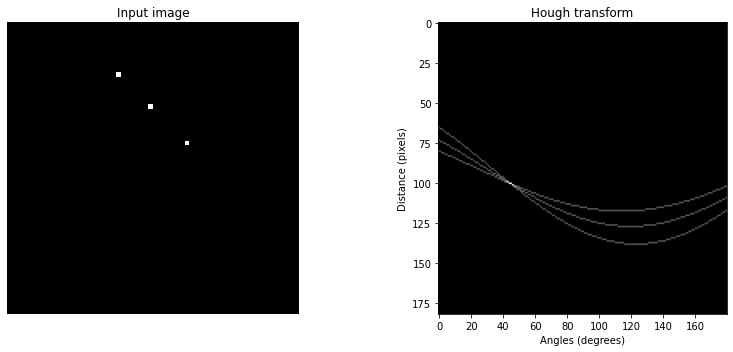

In [34]:
im3 = np.zeros((64,64), dtype=np.uint8)
im3[18, 31] = 1
im3[11, 24] = 1
im3[26, 39] = 1
H, theta, rho = hough_line(im3)
show_hough(H, im3)

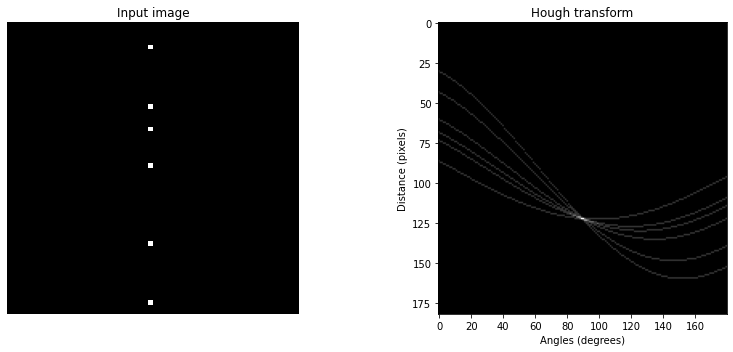

In [35]:
im4 = np.zeros((64,64), dtype=np.uint8)
im4[31, 31] = 1
im4[18, 31] = 1
im4[23, 31] = 1
im4[48, 31] = 1
im4[61, 31] = 1
im4[5, 31] = 1
H, theta, rho = hough_line(im4)
show_hough(H, im4)

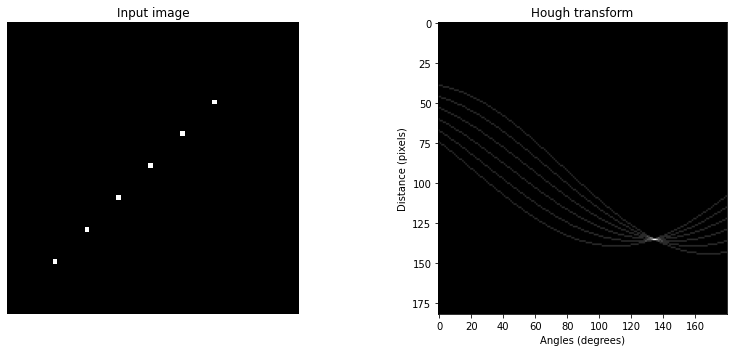

In [36]:
im5 = np.zeros((64,64), dtype=np.uint8)
im5[31, 31] = 1
im5[24, 38] = 1
im5[17, 45] = 1
im5[38, 24] = 1
im5[45, 17] = 1
im5[52, 10] = 1
H, theta, rho = hough_line(im5)
show_hough(H, im5)

### Transformata Hougha dla pojedynczego obiektu

W tym podpunkcie pokazane zostanie praktycznie wykorzystanie transformaty Hougha - do detekcji prostych na sztucznym rysunku.

   1. Wczytaj obraz "kwadraty.png". Wyświetl go.
   2. Wykonaj detekcję krawędzi jedną z metod gradientowych. Ważne aby obraz krawędzi był jak najlepszej jakości - co oznacza cienkie (nawet niekoniecznie ciągłe) krawędzie - dla tego przypadku nie powinno być trudne do uzyskania. Wyświetl obraz po detekcji krawędzi.
   3. Wykonaj transformatę Hougha obrazu krawędziowego. Wykorzystaj funkcję *hough\_line*.
   4. Wyświetl macierz H. Czy widoczna jest taka liczba maksimów jakiej się spodziewamy?

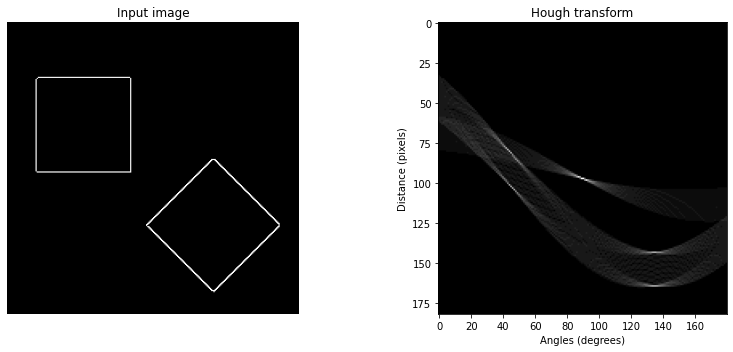

In [12]:
kwadraty = cv2.imread('kwadraty.png', cv2.IMREAD_GRAYSCALE)
kwadraty_edges = cv2.Canny(kwadraty, 1, 2, None, 3, 1)
H, theta, rho = hough_line(cv2.resize(kwadraty_edges, (64, 64)))
show_hough(H, kwadraty_edges)

 5. W module skimage.transform dostępna jest funkcja do automatycznej analizy przestrzeni Hougha - wyszukiwania maksimów - *hough\_line\_peaks*. Jako parametry przyjmuje ona wyniki funkcji *hough\_line* (macierz H, theta i rho). Dodatkowo można podać próg powyżej którego punkt uznawany jest za maksimum (_threshold_ - domyslnie jest to połowa maksimum w przestrzeni H) oraz liczbę poszukiwanych maksimów (*num_peaks*). Funkcja zwraca współrzędne maksimów. Wykorzystaj funkcję *hough\_line\_peaks* do znalezienia maksimów odpowiadających krawędziom kwadratów.
 6. Wyświetl macierz H używając konstrukcji:

Taki zapis pozwoli na dołożenie annotacji (okręgów) w miejscach znalezionych maksimów. Wyrysowanie okręgu w punkcie x, y (o rozmiarze 10, w czerwonym kolorze, bez wypełnienia środka) realizuje wywołanie: 

**circle = plt.Circle((x, y), 10, color='r', fill=False)**

natomiast dołożenie takiego okręgu do obrazu to:

**ax.add_patch(circle)**

Zaznacz maksima na obrazie wykorzystując rezultat funkcji *hough\_line\_peaks* biorąc pod uwagę, że zwraca ona kąty w radianach z przedziału od -pi/2 do pi/2, a rho z przedziału od -r/2 do r/2 gdzie r to pionowy rozmiar przestrzeni Hougha. 

[21 16 15 15 15]
[  2.51396648 -45.75418994  44.74860335  44.74860335 -43.74301676]
[  7.54143646 -10.55801105  73.90607735  52.79005525  11.56353591]
92.51396648044692 98.5414364640884
44.24581005586592 80.44198895027625
134.7486033519553 164.9060773480663
134.7486033519553 143.79005524861878
46.25698324022346 102.56353591160222


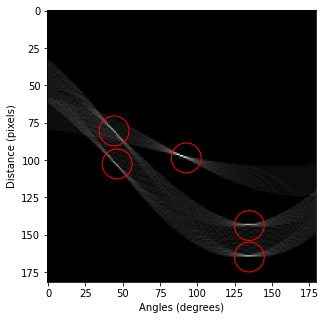

In [38]:
maxs, thetas, rhos = hough_line_peaks(H, theta, rho, num_peaks=20)
print(maxs)
print(np.rad2deg(thetas))
print(rhos)

fig,ax = plt.subplots(1, figsize = (5, 5))
ax.set_aspect('equal')
ax.set_xlabel('Angles (degrees)')
ax.set_ylabel('Distance (pixels)')
for i in range(len(maxs)):
    x = np.rad2deg(thetas[i] + np.pi/2) 
    y = rhos[i] + H.shape[0]/2
    print(x, y)
    circle = plt.Circle((x, y), 10, color='r', fill=False)
    ax.add_patch(circle)
ax.imshow(H, 'gray') # gdzie H jest przestrzenią Hougha
plt.show()

7. Istnieje też możliwość przeprowadzenia transformacji Hougha z użyciem biblioteki OpenCV. W bibliotece znajdują się dwie wersje funkcji wyszukującej linie proste - 'klasyczna' - _HoughLines_ oraz probabilistyczna _HoughLinesP_. Zadna z nich nie zwraca przestrzeni Hougha. Wynikiem działania pierwszej jest lista parametrów prostych (krotki zawierające rho, theta). Druga zwraca krotki 4-ro elementowe ze współrzędnymi końców odcinków wykorzystanych do wylicznia parametrów (czyli znalezienia prostej). 
8. Wyznacz linie obecne na obrazie za pomocą funkcji _HoughLines_. Wykryte linie wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). Do wyświetlania linii wykorzystaj przykładowy kod:

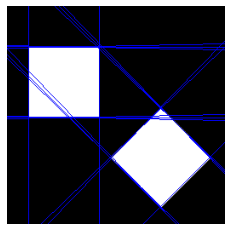

In [39]:
kwadraty = cv2.imread('kwadraty.png', cv2.IMREAD_GRAYSCALE)
kwadraty_edges = cv2.Canny(kwadraty, 1, 2, None, 3, 1)
kwadraty_color = cv2.cvtColor(kwadraty, cv2.COLOR_GRAY2BGR)
lines = cv2.HoughLines(kwadraty_edges, 1, np.pi/180,50)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))  
    cv2.line(kwadraty_color,(x1,y1),(x2,y2),(0,0,255))

plt.imshow(kwadraty_color)
plt.axis("off")
plt.show()

9. Wyznacz odcinki obecne na obrazie za pomocą funkcji _HoughLinesP_. Wykryte odcinki wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). 

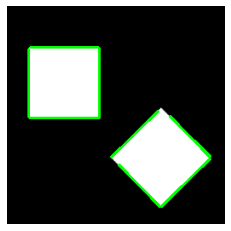

In [40]:
kwadraty = cv2.imread('kwadraty.png', cv2.IMREAD_GRAYSCALE)
kwadraty_edges = cv2.Canny(kwadraty, 1, 2, None, 3, 1)
kwadraty_color = cv2.cvtColor(kwadraty, cv2.COLOR_GRAY2BGR)
lines = cv2.HoughLinesP(kwadraty_edges,1,np.pi/180,50)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(kwadraty_color,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(kwadraty_color)
plt.axis("off")
plt.show()

### Transformata Hougha dla obrazu rzeczywistego.

Bazując na kodzie stworzonym w punkcie B wyszukamy linie na obrazie rzeczywistym.
   1. Wczytaj obraz "lab112.png". Wyświetl go.
   2. Wykorzystując wszystkie poznane techniki przetwarzania obrazów (filtracja, przekształcenia morfologiczne, binaryzację, detekcję krawędzi) wyodrębnij krawędzie samych kwadratów - tak aby były jak najlepszej jakości (cienkie) - jednocześnie eliminując z obrazu zakłócenia.
   3. Wykorzystaj funkcje *hough_line* i *hough_line_peaks* do detekcji linii na obrazie, a następnie np. wykorzystując kod z punktu 8 poprzedniego ustępu wyrysuj na oryginalnym obrazie znalezione linie.

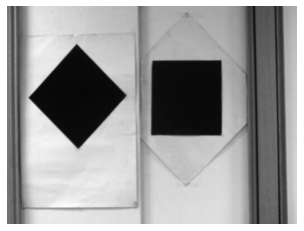

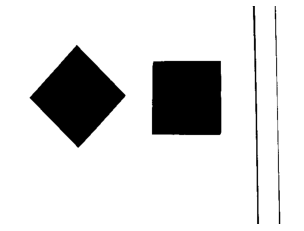

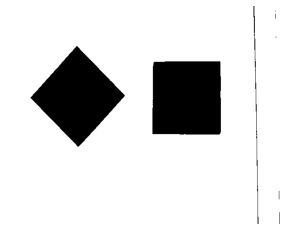

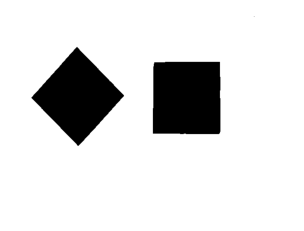

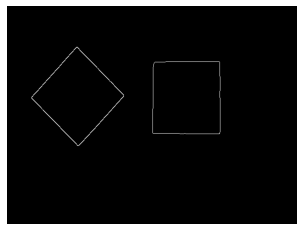

In [41]:
lab112 = cv2.imread('lab112.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(lab112, 'gray')
plt.axis('off')
plt.show()

lab112 = lab112 >= 45
plt.imshow(lab112, 'gray')
plt.axis('off')
plt.show()

el_struct = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
lab112_dilate = cv2.dilate(np.float32(lab112), el_struct)
plt.imshow(lab112_dilate, 'gray')
plt.axis('off')
plt.show()

lab112_dilate2 = cv2.dilate(np.float32(lab112_dilate), el_struct)
plt.imshow(lab112_dilate2, 'gray')
plt.axis('off')
plt.show()

lab112_edges = cv2.Canny(np.uint8(lab112_dilate2), 1, 2, None, 3, 1)
plt.imshow(lab112_edges, 'gray')
plt.axis('off')
plt.show()

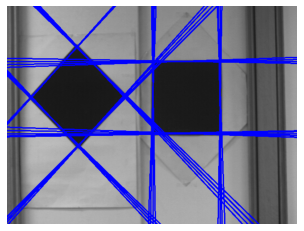

In [42]:
lab112 = cv2.imread('lab112.png', cv2.IMREAD_GRAYSCALE)
lab112_color = cv2.cvtColor(lab112, cv2.COLOR_GRAY2BGR)
lines = cv2.HoughLines(lab112_edges, 1, np.pi/180, 50)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))  
    cv2.line(lab112_color,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(lab112_color)
plt.axis("off")
plt.show()

4. Wczytaj obraz "dom.png". Wypróbuj działanie transformacji Hougha na tym obrazie z wykorzystaniem funkcji _cv2.HoughLinesP_  (oczywiście po odpowiednich przekształceniach). Postaraj się tak przygotować obraz z krawędziami i dobrać parametry aby wyrysować na oryginalnym obrazie odcinki obejmujące zarysy domu. Weź pod uwage dodatkowe parametry funkcji, takie jak:   minLineLength, maxLineGap.

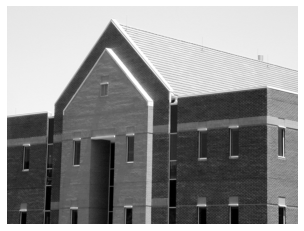

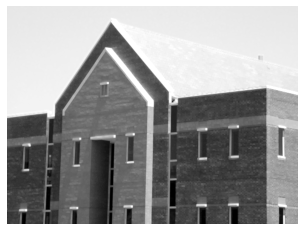

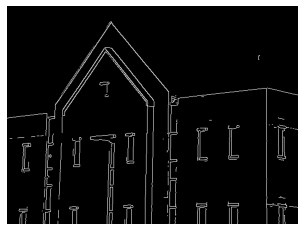

In [43]:
dom = cv2.imread('dom.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(dom, 'gray')
plt.axis('off')
plt.show()

el_struct = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dom_dilate = cv2.dilate(dom, el_struct)
plt.imshow(dom_dilate, 'gray')
plt.axis('off')
plt.show()

dom_edges = cv2.Canny(dom_dilate, 150, 170, None, 3, 1)
plt.imshow(dom_edges, 'gray')
plt.axis('off')
plt.show()

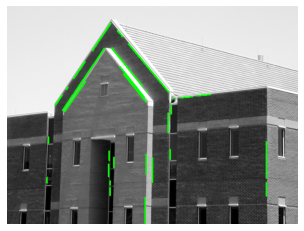

In [44]:
dom_color = cv2.cvtColor(dom, cv2.COLOR_GRAY2BGR)
lines = cv2.HoughLinesP(dom_edges,1,np.pi/180,100)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(dom_color,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(dom_color)
plt.axis("off")
plt.show()